# Ejercicio Aplicando PCA: Principal Component Analysis

### Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

### Cargamos datos de entrada

In [ ]:
dataframe = pd.read_csv(r"comprar_alquilar.csv")

dataframe.tail(10)

In [4]:
for col in dataframe:
    print(col)
    print(sorted(dataframe[col].unique()))

ingresos
[2008, 2022, 2024, 2028, 2032, 2036, 2039, 2064, 2077, 2138, 2151, 2265, 2274, 2308, 2369, 2409, 2448, 2485, 2516, 2550, 2593, 2614, 2825, 2828, 2928, 2937, 2969, 2974, 3000, 3026, 3039, 3043, 3080, 3084, 3105, 3162, 3169, 3184, 3218, 3234, 3299, 3334, 3361, 3382, 3390, 3395, 3437, 3473, 3504, 3543, 3586, 3602, 3608, 3641, 3685, 3731, 3733, 3784, 3796, 3806, 3831, 3951, 3961, 3973, 3976, 3988, 4025, 4054, 4119, 4169, 4203, 4224, 4276, 4403, 4426, 4433, 4434, 4473, 4503, 4505, 4507, 4517, 4532, 4553, 4606, 4648, 4653, 4708, 4714, 4736, 4749, 4792, 4799, 4883, 4885, 4909, 4927, 4943, 4952, 5058, 5099, 5126, 5163, 5218, 5264, 5294, 5415, 5458, 5468, 5502, 5514, 5515, 5536, 5552, 5558, 5572, 5593, 5646, 5656, 5663, 5685, 5692, 5717, 5730, 5749, 5791, 5813, 5848, 5862, 5897, 6000, 6025, 6038, 6044, 6058, 6139, 6148, 6152, 6167, 6194, 6205, 6222, 6251, 6264, 6325, 6332, 6347, 6355, 6381, 6384, 6412, 6455, 6470, 6495, 6500, 6503, 6519, 6692, 6717, 6722, 6744, 6745, 6762, 6771, 6806, 

In [8]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
ingresos,202.0,4958.995050,1682.862556,2008.0,3513.75,4947.5,6374.50,7984.0
gastos_comunes,202.0,971.584158,272.106351,384.0,766.75,968.0,1165.25,1585.0
pago_coche,202.0,211.742574,124.940754,0.0,99.00,208.5,318.75,448.0
gastos_otros,202.0,515.425743,168.103075,201.0,383.25,522.5,656.75,828.0
ahorros,202.0,38749.668317,17365.231870,10319.0,24964.25,38523.0,52150.75,69934.0
vivienda,202.0,373349.638614,136371.525622,176553.0,274810.00,340783.5,444482.00,669540.0
estado_civil,202.0,1.024752,0.837184,0.0,0.00,1.0,2.00,2.0
hijos,202.0,1.232673,1.367833,0.0,0.00,1.0,2.00,4.0
trabajo,202.0,4.490099,2.535794,0.0,2.00,5.0,7.00,8.0
comprar,202.0,0.331683,0.471988,0.0,0.00,0.0,1.00,1.0


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


### Visualicemos las dimensiones

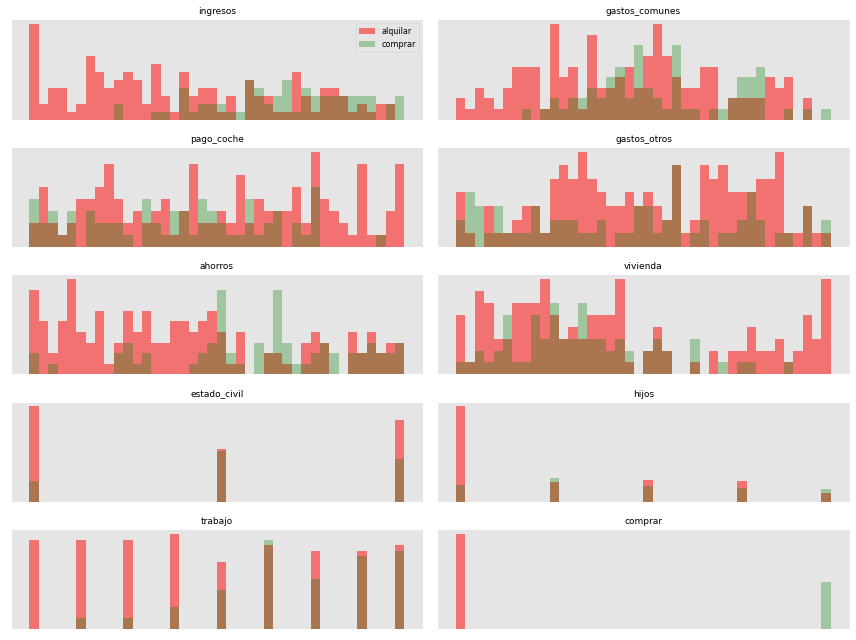

In [7]:
fig,axes =plt.subplots(5,2, figsize=(12, 9)) # 2 columnas cada una con 5 figuras, total 10 features
alquilar=dataframe[dataframe['comprar']==0] # conviene alquilar casa
comprar=dataframe[dataframe['comprar']==1] # conviene comprar casa
ax=axes.ravel()
for i in range(len(dataframe.columns)):
  _,bins=np.histogram(dataframe[dataframe.columns[i]],bins=40)
  ax[i].hist(alquilar.values[:,i],bins=bins,color='r',alpha=.5)# rojo alquilar
  ax[i].hist(comprar.values[:,i],bins=bins,color='g',alpha=0.3)# verde para comprar
  ax[i].set_title(dataframe.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
ax[0].legend(['alquilar','comprar'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

### Ejemplo de cómo se correlacionan

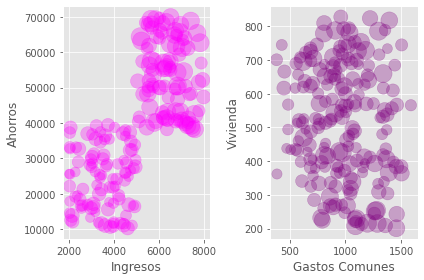

In [9]:
plt.subplot(1,2,1)#fisrt plot
plt.scatter(dataframe['ingresos'], dataframe['ahorros'], s=dataframe['vivienda']*0.0005, color='magenta', label='check', alpha=0.3)
plt.xlabel('Ingresos',fontsize=12)
plt.ylabel('Ahorros',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(dataframe['gastos_comunes'], dataframe['gastos_otros'], s=dataframe['vivienda']*0.0005, color='purple', label='check', alpha=0.3)
plt.xlabel('Gastos Comunes',fontsize=12)
plt.ylabel('Vivienda',fontsize=12)
plt.tight_layout()
plt.show()

## Vamos a Normalizar o Estandarizar los datos

In [10]:
scaler = StandardScaler()
df = dataframe.drop(['comprar'], axis=1)
scaler.fit(df)
X_scaled = scaler.transform(df)

## Aplicamos PCA

In [13]:
pca = PCA(n_components = 9)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("shape of X_pca", X_pca.shape)

shape of X_pca (202, 9)


### Veamos cuántos buenos predictores son las nuevas dimensiones

In [14]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma', np.sum(expl[0:5]))
print('suma acumulada', np.cumsum(expl[0:-1]))

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma 0.852406211771431
suma acumulada [0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885]


### graficamos la variacion explicada acumulada

Text(0, 0.5, 'cumulative explained variance')

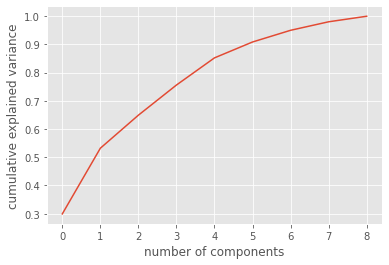

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Veamos la correlación entre las nuevas componentes y las dimensiones originales

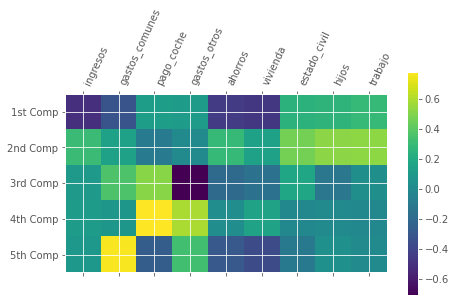

In [18]:
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

## Preparo nuevas entradas para validar el algoritmo

In [19]:
# Split dataset in training and test datasets
# Split dataset in training and test datasets
dfScaledPca = pd.DataFrame(X_pca, columns = df.columns)
dfScaledPca["comprar"]=dataframe["comprar"]
print (dfScaledPca.head())
print(dfScaledPca.shape)
X_train, X_test = train_test_split(dfScaledPca, test_size=0.2, random_state=4) #6 
y_train =X_train["comprar"]
y_test = X_test["comprar"]
X_train = X_train.drop(['comprar'], axis=1)
X_test = X_test.drop(['comprar'], axis=1)

   ingresos  gastos_comunes  pago_coche  gastos_otros   ahorros  vivienda  \
0 -1.321915       -0.222950   -1.599863     -0.885014  0.646617 -0.700208   
1 -1.147878        1.716967   -0.395722     -0.447960 -0.687805 -0.231969   
2 -0.090369        1.836066   -1.359382      0.337505  0.742387  0.593030   
3 -3.455898       -0.078279    0.202382     -1.573584 -0.068551 -0.051945   
4 -0.916933       -1.184676   -0.190036      0.117804 -0.147753 -0.619750   

   estado_civil     hijos   trabajo  comprar  
0     -0.318031  0.751809  0.269984        1  
1     -1.542487 -0.221799  0.438425        0  
2      1.540495 -0.668120  0.153463        1  
3     -0.909409 -0.684486 -0.129045        0  
4      0.450419 -0.194341  0.687452        1  
(202, 10)


In [22]:
dfScaledPca.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,-1.321915,-0.222950,-1.599863,-0.885014,0.646617,-0.700208,-0.318031,0.751809,0.269984,1
1,-1.147878,1.716967,-0.395722,-0.447960,-0.687805,-0.231969,-1.542487,-0.221799,0.438425,0
2,-0.090369,1.836066,-1.359382,0.337505,0.742387,0.593030,1.540495,-0.668120,0.153463,1
3,-3.455898,-0.078279,0.202382,-1.573584,-0.068551,-0.051945,-0.909409,-0.684486,-0.129045,0
4,-0.916933,-1.184676,-0.190036,0.117804,-0.147753,-0.619750,0.450419,-0.194341,0.687452,1


## Prediccion con KNN

### Con datos de entrada con reducción de dimensiones por PCA

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train.values, y_train)

y_pred = knn.predict(X_test)

## Resultados Obtenidos

In [24]:
print('Precision set entrenamiento', knn.score(X_train, y_train))
print('Precision set test', knn.score(X_test, y_test))

Precision set entrenamiento 0.9440993788819876
Precision set test 0.8048780487804879
